In [1]:
# python version: python3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import os


### part a

In [2]:
#reading all features except price
train_x_a = pd.read_csv("training.csv").drop("price", axis = 1)
#reading only price
train_y = pd.read_csv("training.csv", usecols = ["price"])






In [3]:
train_x_a.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,141.0,mpfi,NaN,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,four,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0


In [4]:
train_y.head(2)

,price
0,15985.0
1,7349.0


### part b

In [5]:
#here i get the non_columns by using isnull and any and store them.
nan_columns = [i for i in train_x_a.columns if train_x_a[i].isnull().any()]
#i look at train_y and store the na ones' indexes
train_y_null_indexes = train_y[train_y['price'].isnull()].index.tolist()
#dropping na values from train_y
train_y = train_y.dropna()
#by using the code i stored y null indexes, i drop the very same ones from train_x_a
train_x_a = train_x_a.drop(index = train_y_null_indexes)

#In this part i get the median values of every feature, and store them because in future too.
median_wheelbase_a = train_x_a['wheelbase'].median()
median_carlength_a = train_x_a['carlength'].median()
median_carwidth_a = train_x_a['carwidth'].median()
median_carheight_a = train_x_a['carheight'].median()
median_curbweight_a = train_x_a['curbweight'].median()
median_enginesize_a = train_x_a['enginesize'].median()
median_boreratio_a = train_x_a['boreratio'].median()
median_stroke_a = train_x_a['stroke'].median()
median_compressionratio_a = train_x_a['compressionratio'].median()
median_horsepower_a = train_x_a['horsepower'].median()
median_carwidth_a = train_x_a['carwidth'].median()
median_peakrpm_a = train_x_a['peakrpm'].median()
median_citympg_a = train_x_a['citympg'].median()
median_highwaympg_a = train_x_a['highwaympg'].median()
median_price_a = train_y['price'].median()

train_x_b = train_x_a.fillna({
    'wheelbase': median_wheelbase_a,
    'carlength': median_carlength_a,
    'carheight': median_carheight_a,
    'carwidth': median_carwidth_a,
    'curbweight': median_curbweight_a,
    'enginesize': median_enginesize_a,
    'boreratio': median_boreratio_a,
    'stroke': median_stroke_a,
    'compressionratio': median_compressionratio_a,
    'horsepower': median_horsepower_a,
    'carwidth': median_carwidth_a,
    'peakrpm': median_peakrpm_a,
    'citympg': median_citympg_a,
    'highwaympg': median_highwaympg_a})


In [6]:
print(nan_columns)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [7]:
train_x_b.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,141.0,mpfi,3.31,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,four,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0


### part c

In [8]:
#i gel the columns of train_x_b
col_x_b = train_x_b.columns
#getting the numerical columns.
num_x_b = train_x_b._get_numeric_data().columns

#by doing col_x_b - num_x_b = i get categorical columns, just like (1 - what you have = what you want/probability.)
categorical_columns =  [i for i in set(col_x_b) - set(num_x_b)]


In [9]:
print(categorical_columns)

['fueltype', 'cylindernumber', 'drivewheel', 'fuelsystem', 'enginelocation', 'enginetype', 'carbody', 'doornumber', 'aspiration']


### part d

In [10]:
#get the data from b to d
train_x_d = train_x_b.copy()
#get one hot encoding with dummies with a for loop
for column in categorical_columns:
    train_x_d = pd.get_dummies(train_x_d, columns=[column], prefix = [column])

#i also store the x_d_column for the next part.    
train_x_d_column = []
for column in train_x_d:
    train_x_d_column.append(column)


In [11]:
train_x_d.head(2)


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginetype_rotor,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,doornumber_four,doornumber_two,aspiration_std,aspiration_turbo
0,104.3,188.8,67.2,56.2,2403.0,141.0,3.31,3.15,9.5,114.0,...,0,0,0,0,1,0,1,0,1,0
1,94.5,170.2,63.8,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,...,0,0,0,0,0,1,1,0,1,0


### part e

In [12]:
from sklearn.preprocessing import StandardScaler
import numpy as np

#first i fitted and after, i transform it because we will use this on one of the next part.
scaler = StandardScaler()
train_x_e = scaler.fit(train_x_d)
train_x_e = scaler.transform(train_x_d)
#here since my output is a numpy i converted it to a dataframe again
train_x_e = pd.DataFrame(train_x_e)
#giving the names of the columns back.
train_x_e.columns = train_x_d_column





In [13]:
train_x_e.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginetype_rotor,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,doornumber_four,doornumber_two,aspiration_std,aspiration_turbo
0,1.040486,1.218356,0.697865,1.103479,-0.217359,0.427546,-0.000506,-0.298040,-0.115772,0.312992,...,-0.114332,-0.162758,-0.140488,-0.752101,1.006473,-0.327327,0.895726,-0.895726,0.530087,-0.530087
1,-0.729389,-0.266100,-1.003614,-0.089818,-0.968641,-0.679464,-0.628165,0.134277,-0.142667,-0.909358,...,-0.114332,-0.162758,-0.140488,-0.752101,-0.993569,3.055050,0.895726,-0.895726,0.530087,-0.530087


## Data Exploration

### part f in here i used the code from the book to plot to all the features in my data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262A18DCE10>,
      dtype=object)

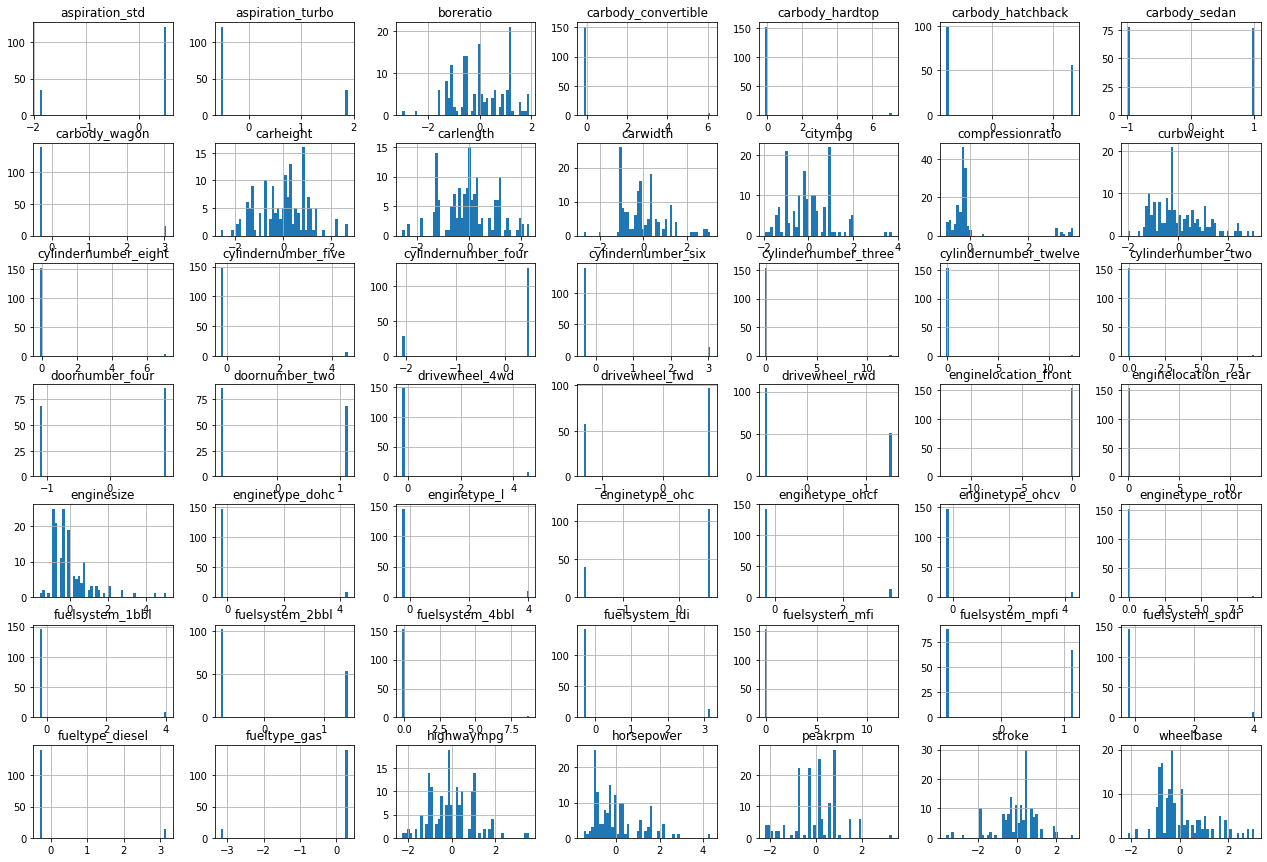

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
train_x_e.hist(bins=50, figsize=(22,15), alpha = 1)
#when i look at the data, there might be extreme point on curbeweight, stroke, horsepower, carwidth

### part g


In [15]:
#i concatted the my features and my target to be able to use corr()
train_x_e_and_train_y = pd.concat([train_x_e,train_y], axis=1)
#i assigned their correlation to corr_matrix
corr_matrix = train_x_e_and_train_y.corr().abs()
#by using price as the target i listed the correlations
print(corr_matrix["price"].sort_values(ascending=False))

#I looked at the continues variables we had first(before dummies, and picked the highest correlating ones.)
top_5_corr = ["citympg", "highwaympg", "enginesize", "compressionratio","curbweight"]



price                    1.000000e+00
citympg                  1.755342e-01
highwaympg               1.729083e-01
enginesize               1.659466e-01
cylindernumber_eight     1.627708e-01
carbody_hardtop          1.499560e-01
carbody_convertible      1.416050e-01
enginetype_ohcv          1.407727e-01
compressionratio         1.314089e-01
fuelsystem_mfi           1.238090e-01
curbweight               1.204517e-01
fuelsystem_spdi          1.116357e-01
horsepower               1.098006e-01
boreratio                9.959652e-02
fueltype_gas             9.818442e-02
fueltype_diesel          9.818442e-02
fuelsystem_idi           9.818442e-02
carwidth                 9.192073e-02
carbody_sedan            8.950100e-02
stroke                   8.718831e-02
carbody_wagon            8.533443e-02
enginetype_dohc          8.129676e-02
carlength                7.657606e-02
cylindernumber_four      5.652825e-02
fuelsystem_2bbl          5.292872e-02
carbody_hatchback        5.149880e-02
carheight   

In [16]:
print(top_5_corr)

['citympg', 'highwaympg', 'enginesize', 'compressionratio', 'curbweight']


### part h

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262A449C940>,
      dtype=object)

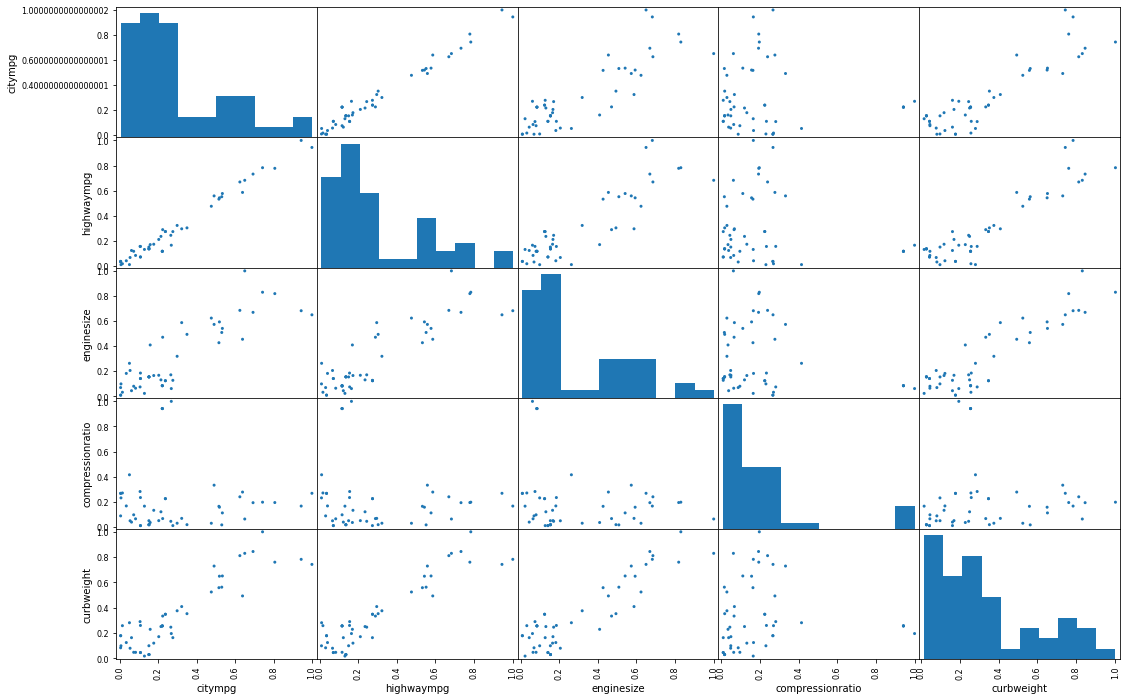

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(corr_matrix[top_5_corr], figsize=(18, 12), alpha = 1)

## LINEAR REGRESSION TO PREDICT CAR PRICES

### part i

In [18]:
#importing from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_model = LinearRegression()
#fitted my model by using train_x_e and train_y
lr_model.fit(train_x_e, train_y)
model_predictions = lr_model.predict(train_x_e)
#this part getting the mean squared error.
lin_mse = mean_squared_error(train_y, model_predictions)
print("Printing mse: ", lin_mse)



Printing mse:  4293452.590313227


### part j

In [19]:
#import cross validation
from sklearn.model_selection import cross_val_score
#using my linear model and train_x_e and train_y
scores = cross_val_score(lr_model, train_x_e, train_y, scoring="neg_mean_squared_error", cv=5)
#i set the scoring as neg_mean_squared and this part i take the abs. of it.
train_mse_score = abs((scores))

print(train_mse_score)

[10057504.28226571  6941861.46536291  8010686.21848619 11491802.34766714
  6098813.9646496 ]


In [20]:
average_mse = np.absolute(train_mse_score.mean())
print(average_mse)

8520133.655686306


### part k

In [21]:
test_x = pd.read_csv("test.csv").drop("price", axis = 1)
test_y = pd.read_csv("test.csv", usecols = ["price"])

#getting the null indexes in the test_y
test_y_null_indexes = test_y[test_y['price'].isnull()].index.tolist()
#dropping them
test_y = test_y.dropna()
#dropping the same indexes from the test_x 
test_x = test_x.drop(test_y_null_indexes)
###index = test_y_null_indexes

#i used the same values from the the train medians and filled the NaN value in test_x
test_x = test_x.fillna({
    'wheelbase': median_wheelbase_a,
    'carlength': median_carlength_a,
    'carheight': median_carheight_a,
    'carwidth': median_carwidth_a,
    'curbweight': median_curbweight_a,
    'enginesize': median_enginesize_a,
    'boreratio': median_boreratio_a,
    'stroke': median_stroke_a,
    'compressionratio': median_compressionratio_a,
    'horsepower': median_horsepower_a,
    'carwidth': median_carwidth_a,
    'peakrpm': median_peakrpm_a,
    'citympg': median_citympg_a,
    'highwaympg': median_highwaympg_a})

#get the columns of text_x
col_test_x = test_x.columns
#get the numerical col data of test_x
num_test_x = test_x._get_numeric_data().columns

#get the categorical_columns in test
categorical_columns_test  =  [i for i in set(col_test_x) - set(num_test_x)]


#onehot with dummies for categorical_columns_test
for column in categorical_columns_test:
    test_x = pd.get_dummies(test_x, columns= [column], prefix = [column])

    
#getting the test_x columns. to use it after scale to give the names back to the features. 
test_x_column = []
for i in test_x:
    test_x_column.append(i)


#in this part we are only going to do transform we don't do scale 
#we want to keep the fit as it is.
temp = scaler.transform(test_x)
test_x = pd.DataFrame(temp)
test_x.columns = test_x_column


In [22]:
test_x.head(2)


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginetype_rotor,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,doornumber_four,doornumber_two,aspiration_std,aspiration_turbo
0,1.311385,1.529613,2.799691,0.882498,0.874873,0.301750,-0.471250,0.473955,-0.384726,0.204338,...,-0.114332,-0.162758,-0.140488,-0.752101,-0.993569,3.055050,0.895726,-0.895726,0.530087,-0.530087
1,-0.368190,0.148909,-1.654180,0.175359,-0.278810,-0.352393,-0.628165,1.029791,-0.250249,-0.447582,...,-0.114332,-0.162758,-0.140488,-0.752101,1.006473,-0.327327,0.895726,-0.895726,0.530087,-0.530087


In [23]:
test_y.head(2)

,price
0,18920.0
1,10295.0


### part l

In [24]:
#predicting by using linear model, "test_x" as a parameter
test_model_predictions = lr_model.predict(test_x)
#getting the mse
test_mse_score = mean_squared_error(test_y, test_model_predictions)
print(lr_model.score(test_x, test_y))
predicted_values = test_model_predictions
#model coef.
print(lr_model.coef_)

0.8315430095519597
[[ -182.50390789    17.77791293   482.81638969   104.58617988
   1594.18156825  4256.71313249   -38.99302906 -1321.89317472
    384.75573887  1307.10308185   517.30038623  -656.6777968
    909.82948041    63.44882098   -63.44882098  1597.61307444
   -137.55006193  -995.94531305   567.19331492   431.12406866
   -315.88166818   176.79676558  -100.41702336   -55.47707253
    101.51605056   130.33179437   -60.94295514   176.79676558
     63.44882098  -119.02206221   183.04212938  -516.78989561
   -267.79355313   267.79355313  -371.41920837  -187.39716713
   1176.64256697   -84.87719409 -1725.97024765   176.79676558
    309.15477368    41.94235625  -351.57058775   212.54573996
     26.44248644   -79.19764443    79.19764443  -345.01712899
    345.01712899]]


In [25]:
print(predicted_values[10:13])

[[25820.17373261]
 [15266.75224294]
 [ 7236.56883959]]


In [26]:
print(test_mse_score)

14515571.216237938


### part m

In [27]:
#getting polys from sklearn
from sklearn.preprocessing import PolynomialFeatures
#i set the degree as 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
#fit and transformed in this part.
train_x_m_poly_model = poly_features.fit_transform(train_x_e)
#i converted it to dataframe again.
train_x_m = pd.DataFrame(train_x_m_poly_model)


In [28]:

train_x_m.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273
0,1.040486,1.218356,0.697865,1.103479,-0.217359,0.427546,-0.000506,-0.298040,-0.115772,0.312992,...,0.802326,-0.802326,0.474812,-0.474812,0.802326,-0.474812,0.474812,0.280992,-0.280992,0.280992
1,-0.729389,-0.266100,-1.003614,-0.089818,-0.968641,-0.679464,-0.628165,0.134277,-0.142667,-0.909358,...,0.802326,-0.802326,0.474812,-0.474812,0.802326,-0.474812,0.474812,0.280992,-0.280992,0.280992


In [29]:
#i created a new lr model.
lr_model_poly = lr_model.fit(train_x_m, train_y)

In [30]:
#this part i passed the lr model poly, train_x_m and train_y
scores_poly = cross_val_score(lr_model_poly, train_x_m, train_y, scoring="neg_mean_squared_error", cv=5)
poly_reg_mse_scores = abs((scores_poly))
#getting the mean of folds.
average_mse = poly_reg_mse_scores.mean()
print(average_mse)

1.259901337756996e+30


### part n

In [31]:
#getting the lasso from sk
from sklearn.linear_model import Lasso
#first setting the alphaw with the default parameter.
lasso_reg = Lasso()
#fitted my model
lasso = lasso_reg.fit(train_x_m, train_y) 
#and predicted
lasso_reg.predict(train_x_m)

C:\Users\Fatih Enes Usta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13028966.545829877, tolerance: 920722.9017414534
  positive)


array([15916.66190968,  7300.23158887,  6711.80352866, 15704.36920763,
        6390.43037247,  7249.36589963, 45400.64738253,  8039.92949134,
       36853.92859744, 12449.18257097,  6861.97550527, 22578.94820644,
       16934.16780937, 13491.19455026, 11206.97193156, 12619.19620897,
       21987.86979599, 16710.17885722, 10782.5470854 ,  6513.12096374,
        8237.41898186, 12858.66151545, 16710.17885722,  7396.15283819,
        6864.68775491,  5529.39478154, 16347.53925154,  9076.37383045,
        8212.65805866,  6773.12044096,  8813.03543778, 11690.66683543,
       16680.86095964, 17854.79478842,  5315.18628939,  7911.24673203,
        8974.9851829 ,  5333.13005977, 24561.98613897,  6227.36561129,
       12965.68647152, 18923.14373463, 23858.30720994,  8981.65468454,
        9278.31333844,  6966.12120215, 32241.2794519 ,  5147.79056747,
        6394.35016392,  9168.79841251, 18305.10646852,  7224.49271058,
       11845.00366758, 11863.54278962,  9308.56267973, 15272.08385673,
      

In [32]:
#doing a cross validation by passing lasso, train_x_m, and train_y
lasso_cross_scores = cross_val_score(lasso, train_x_m, train_y, scoring="neg_mean_squared_error", cv=5)
train_mse_score = abs((lasso_cross_scores))
#getting the mean of folds.
average_mse = train_mse_score.mean()
print(average_mse)

C:\Users\Fatih Enes Usta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5572486.693176546, tolerance: 682422.0779853245
  positive)
C:\Users\Fatih Enes Usta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10159733.74511217, tolerance: 754070.2752435483
  positive)
C:\Users\Fatih Enes Usta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9713821.069773573, tolerance: 814699.3775705019
  positive)
C:\Users\Fatih Enes Usta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase

41454817.62676425


C:\Users\Fatih Enes Usta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6829114.776645947, tolerance: 757265.7578705021
  positive)


### part o

In [33]:
#i created two dict. to first get the all the scores and for the second to get the mse of them.
all_scores = {}
#this one is for means.
mean_scores = {}
#in the loop, passed(i) as the alpha to get the values on lasso and after that get the cross_val_scores.

#in the question it said between 1 and 3000 so, set the last value as 3010 to reach the 3000 alpha
for i in range(1,3010,10):
    lasso_reg = Lasso(alpha = i)
    lasso = lasso_reg.fit(train_x_m, train_y) 
    lasso_reg.predict(train_x_m)
    lasso_cross_scores = cross_val_score(lasso_reg, train_x_m, train_y, scoring="neg_mean_squared_error", cv=5)    
    #i filled my dictionaries
    all_scores[i] = abs(lasso_cross_scores)
    mean_scores[i] = abs(lasso_cross_scores.mean())

#in here i get the alpha from the min score from the mean scores dictionary, it is the key.
min_alpha = min(mean_scores, key=mean_scores.get)
#in here i pass the key to get the value of that.
min_error = mean_scores.get(min_alpha)


C:\Users\Fatih Enes Usta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13028966.545829877, tolerance: 920722.9017414534
  positive)
C:\Users\Fatih Enes Usta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5572486.693176546, tolerance: 682422.0779853245
  positive)
C:\Users\Fatih Enes Usta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10159733.74511217, tolerance: 754070.2752435483
  positive)
C:\Users\Fatih Enes Usta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increas

C:\Users\Fatih Enes Usta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1951208.5733183473, tolerance: 754070.2752435483
  positive)
C:\Users\Fatih Enes Usta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1996362.7661572695, tolerance: 814699.3775705019
  positive)
C:\Users\Fatih Enes Usta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3310463.4492251575, tolerance: 671553.4068121022
  positive)
C:\Users\Fatih Enes Usta\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to incre

Text(0, 0.5, 'Average MSE scores')

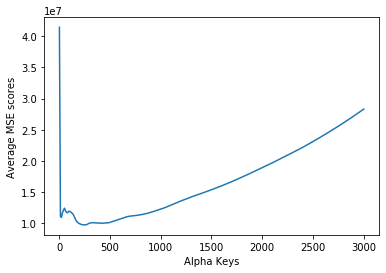

In [34]:
#getting the values for the plotting part
all_list = list(all_scores.values())
#getting the respective alpha values
alpha_keys = list(all_scores.keys())
#average cv scores getting with mean
average_cv_scores = np.mean(all_list, axis = 1)
np.where(average_cv_scores == average_cv_scores.min())

#plotting part with average scores and respective alpha keys
plt.plot(alpha_keys, average_cv_scores)
plt.xlabel('Alpha Keys')
plt.ylabel('Average MSE scores')

In [35]:
print(f"Minimum error was {round(min_error, 2)} at alpha {min_alpha}")

Minimum error was 9715326.99 at alpha 261


### part p

In [36]:
#in this part we use gridSearch with SVR
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

#we put the parameters as in the assignment
param_grid = [
        {'kernel': ['linear'], 'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

#calling svr and doing grid search
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
#fitting our datas.
grid_search.fit(train_x_e, train_y)

#getting the best score since we get it negative we multipy it with (-)
negative_mse = grid_search.best_score_
best_mse = np.mean(-negative_mse)
#this part we get the best parameter.
best_parameters = grid_search.best_params_

print(best_mse)
print(best_parameters)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    6.0s


9849741.472749684
{'C': 3000.0, 'kernel': 'linear'}


[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:    9.3s finished
C:\Users\Fatih Enes Usta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
